In [1]:
from datetime import datetime
Check_date = datetime.today().strftime('%Y-%m-%d')

import pandas as pd
import numpy as np
import os
import requests as re 
from copy import deepcopy

from google.colab import drive, auth, files
drive.mount('/content/drive')
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

Mounted at /content/drive


In [2]:
seed = 42
np.random.seed(seed)

In [3]:
month = '202211_1'

In [4]:
PO_1 = pd.read_csv('/content/drive/MyDrive/PO_review/data/{}/PO_1.csv'.format(month))
PO_2 = pd.read_csv('/content/drive/MyDrive/PO_review/data/{}/PO_2.csv'.format(month))
PO_3 = pd.read_csv('/content/drive/MyDrive/PO_review/data/{}/PO_3.csv'.format(month))
PO_4 = pd.read_csv('/content/drive/MyDrive/PO_review/data/{}/PO_4.csv'.format(month))

In [5]:
PO_fraud_1 = pd.read_csv('/content/drive/MyDrive/PO_review/data/{}/PO_fraud_1.csv'.format(month))
PO_fraud_2 = pd.read_csv('/content/drive/MyDrive/PO_review/data/{}/PO_fraud_2.csv'.format(month))
PO_fraud_3 = pd.read_csv('/content/drive/MyDrive/PO_review/data/{}/PO_fraud_3.csv'.format(month))
PO_fraud_4 = pd.read_csv('/content/drive/MyDrive/PO_review/data/{}/PO_fraud_4.csv'.format(month))

In [6]:
PO_1.rename(columns={
    'User Id': 'user_id', 
    'Pl Name': 'pl_name', 
    'Total Order': 'total_orders', 
    '% orders flagged fraud': '%_orders_flagged_fraud',
    '% orders flagged fraud Smp Spay': '%_orders_flagged_fraud_smp_spay', 
    '% payment failed PLB/PB': '%_payment_failed_plb/pb', 
    '% failed significant PB PLB': '%_failed_significant_pb_plb', 
    '% failed high PB PLB': '%_failed_high_pb_plb', 
    '% failed Smp Spay': '%_failed_smp_spay', 
    '% failed significant Smp Spay': '%_failed_significant_smp_spay', 
    '% failed high Smp Spay': '%_failed_high_smp_spay', 
    '% dispute PB PLB': '%_dispute_pb_plb', 
    '% dispute Smp Spay': '%_dispute_smp_spay', 
    '% dispute fraudulent': '%_dispute_fraudulent', 
    '% dispute product not received': '%_dispute_product_not_received'
}, inplace=True)

PO_fraud_1.rename(columns={
    'User Id': 'user_id', 
    'Pl Name': 'pl_name', 
    'Total Order': 'total_orders', 
    '% orders flagged fraud': '%_orders_flagged_fraud', 
    '% orders flagged fraud Smp Spay': '%_orders_flagged_fraud_smp_spay', 
    '% payment failed PLB/PB': '%_payment_failed_plb/pb', 
    '% failed significant PB PLB': '%_failed_significant_pb_plb', 
    '% failed high PB PLB': '%_failed_high_pb_plb', 
    '% failed Smp Spay': '%_failed_smp_spay', 
    '% failed significant Smp Spay': '%_failed_significant_smp_spay', 
    '% failed high Smp Spay': '%_failed_high_smp_spay', 
    '% dispute PB PLB': '%_dispute_pb_plb', 
    '% dispute Smp Spay': '%_dispute_smp_spay', 
    '% dispute fraudulent': '%_dispute_fraudulent', 
    '% dispute product not received': '%_dispute_product_not_received'
}, inplace=True)

In [7]:
PO_2.rename(columns={
    'User Id': 'user_id', 
    'Pl Name': 'pl_name', 
    '% order cancel fraud': '%_order_cancel_fraud', 
    '% order cancel DMCA': '%_order_cancel_dmca', 
    'Sum amount having issue': 'sum_amount_having_issue', 
    'Avg Profit 3 D': 'avg_profit_3d', 
    'Avg Profit 7 D': 'avg_profit_7d', 
    'Avg Profit 30 D': 'avg_profit_30d', 
    '% order by direct source': '%_order_by_direct_sources'
}, inplace=True)

PO_fraud_2.rename(columns={
    'User Id': 'user_id', 
    'Pl Name': 'pl_name', 
    '% order cancel fraud': '%_order_cancel_fraud', 
    '% order cancel DMCA': '%_order_cancel_dmca', 
    'Sum amount having issue': 'sum_amount_having_issue', 
    'Avg Profit 3 D': 'avg_profit_3d', 
    'Avg Profit 7 D': 'avg_profit_7d', 
    'Avg Profit 30 D': 'avg_profit_30d', 
    '% order by direct source': '%_order_by_direct_sources'
}, inplace=True)

In [8]:
PO_3.rename(columns={
    'User Id': 'user_id', 
    'Pl Name': 'pl_name', 
    'Count Ip Location': 'count_ip_location', 
    'Country': 'country', 
    'City': 'city', 
    'City.1': 'city_1', 
    'Compare Destination Emails': 'compare_destination_emails', 
    'Is Staff Violation': 'is_staff_violation'
}, inplace=True)

PO_fraud_3.rename(columns={
    'User Id': 'user_id', 
    'Pl Name': 'pl_name', 
    'Count Ip Location': 'count_ip_location', 
    'Country': 'country', 
    'City': 'city', 
    'City.1': 'city_1', 
    'Compare Destination Emails': 'compare_destination_emails', 
    'Is Staff Violation': 'is_staff_violation'
}, inplace=True)

In [9]:
PO_4.rename(columns={
    'User Id': 'user_id', 
    'Pl Name': 'pl_name', 
    'Cr Last 3 D': 'cr_last_3d', 
    'Cr Last 7 D': 'cr_last_7d', 
    'Cr Last 30 D': 'cr_last_30d', 
    'Traffic Dr 3 D': 'traffic_dr_3d', 
    'Traffic Dr 7 D': 'traffic_dr_7d', 
    'Traffic Dr 30 D': 'traffic_dr_30d'
}, inplace=True)

PO_fraud_4.rename(columns={
    'User Id': 'user_id', 
    'Pl Name': 'pl_name', 
    'Cr Last 3 D': 'cr_last_3d', 
    'Cr Last 7 D': 'cr_last_7d', 
    'Cr Last 30 D': 'cr_last_30d', 
    'Traffic Dr 3 D': 'traffic_dr_3d', 
    'Traffic Dr 7 D': 'traffic_dr_7d', 
    'Traffic Dr 30 D': 'traffic_dr_30d'
}, inplace=True)

In [10]:
pd.set_option('display.max_columns', None)
PO_1_2 = pd.merge(PO_1, PO_2, how='outer', on=['user_id', 'pl_name'])
PO_1_3 = pd.merge(PO_1_2, PO_3, how='outer', on=['user_id', 'pl_name'])
PO_1_4 = pd.merge(PO_1_3, PO_4, how='outer', on=['user_id', 'pl_name'])
PO_1_4.drop('city_1', axis=1, inplace=True)

In [11]:
PO_fraud_1_2 = pd.merge(PO_fraud_1, PO_fraud_2, how='outer', on=['user_id', 'pl_name'])
PO_fraud_1_3 = pd.merge(PO_fraud_1_2, PO_fraud_3, how='outer', on=['user_id', 'pl_name'])
PO_fraud_1_4 = pd.merge(PO_fraud_1_3, PO_fraud_4, how='outer', on=['user_id', 'pl_name'])
PO_fraud_1_4.drop('city_1', axis=1, inplace=True)

In [12]:
PO_1_4.drop_duplicates(inplace=True)
PO_1_4.reset_index(inplace=True, drop=True)

In [13]:
PO_fraud_1_4.drop_duplicates(inplace=True)
PO_fraud_1_4.reset_index(inplace=True, drop=True)

In [14]:
label_1 = PO_fraud_1_4['user_id'].tolist()
PO_label_0 = PO_1_4[~PO_1_4['user_id'].isin(label_1)]

In [15]:
PO_1_4['pl_name'] = PO_1_4['pl_name'].astype(str)
PO_1_4['count_ip_location'] = PO_1_4['count_ip_location'].astype(str)
PO_1_4['country'] = PO_1_4['country'].astype(str)
PO_1_4['city'] = PO_1_4['city'].astype(str)
PO_1_4['compare_destination_emails'] = PO_1_4['compare_destination_emails'].astype(str)

In [16]:
for col in PO_1_4.columns:
    weird = (PO_1_4[[col]].applymap(type) != PO_1_4[[col]].iloc[0].apply(type)).any(axis=1)
    if len(PO_1_4[weird]) > 0:
        print(col)

In [17]:
PO_label_0['pl_name'] = PO_label_0['pl_name'].astype(str)
PO_label_0['count_ip_location'] = PO_label_0['count_ip_location'].astype(str)
PO_label_0['country'] = PO_label_0['country'].astype(str)
PO_label_0['city'] = PO_label_0['city'].astype(str)
PO_label_0['compare_destination_emails'] = PO_label_0['compare_destination_emails'].astype(str)

<ipython-input-17-0df1440b2a0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PO_label_0['pl_name'] = PO_label_0['pl_name'].astype(str)
<ipython-input-17-0df1440b2a0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PO_label_0['count_ip_location'] = PO_label_0['count_ip_location'].astype(str)
<ipython-input-17-0df1440b2a0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [18]:
for col in PO_fraud_1_4.columns:
    weird = (PO_fraud_1_4[[col]].applymap(type) != PO_fraud_1_4[[col]].iloc[0].apply(type)).any(axis=1)
    if len(PO_fraud_1_4[weird]) > 0:
        print(col)

city
compare_destination_emails


In [19]:
PO_fraud_1_4['city'] = PO_fraud_1_4['city'].astype(str)
PO_fraud_1_4['compare_destination_emails'] = PO_fraud_1_4['compare_destination_emails'].astype(str)

# Run model to test features

## Create label

In [20]:
df_label_1 = deepcopy(PO_fraud_1_4)
df_label_1['label'] = 1

In [21]:
df_label_0 = deepcopy(PO_label_0)
df_label_0['label'] = 0

In [22]:
df = pd.concat([df_label_1, df_label_0])

In [23]:
for c in df.columns:
    col_type = df[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        df[c] = df[c].astype('category')
df['user_id'] = df['user_id'].astype('category') # convert user_id to categorical feature to avoid misleading

In [24]:
X = df.drop('label', axis=1)
y = df['label']

## Split dataset into training and test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## LightGBM Model Development and Training

In [26]:
import lightgbm as lgb 
clf = lgb.LGBMClassifier(random_state=42)
clf.fit(X_train, y_train)

LGBMClassifier(random_state=42)

## Model prediction

In [27]:
y_pred=clf.predict(X_test)

## View accuracy

In [28]:
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
accuracy = roc_auc_score(y_test, y_pred)
print('LightGBM Model accuracy score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.5483


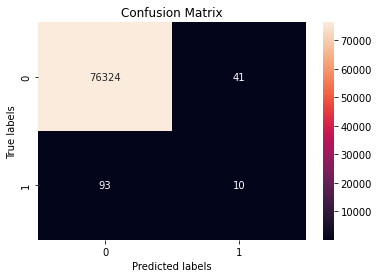

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

## Plot feature importance

<AxesSubplot:>

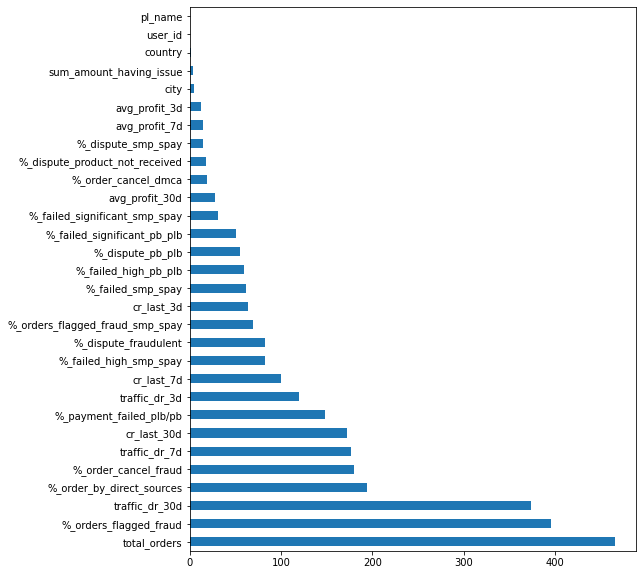

In [30]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

## Fine tune model using Optuna

In [31]:
! pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.6 MB/s eta 0:00:00


In [32]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [33]:
def objective(trial):
  param = {
                "n_estimators" : trial.suggest_int('n_estimators', 0, 500),
                'max_depth':trial.suggest_int('max_depth', 3, 5),
                'reg_alpha':trial.suggest_float('reg_alpha',0,6),
                'reg_lambda':trial.suggest_float('reg_lambda',0,2),
                'min_child_weight':trial.suggest_int('min_child_weight',0,5),
                'gamma':trial.suggest_float('gamma', 0, 4),
                'learning_rate':trial.suggest_float('learning_rate',0.05,0.5),
                'colsample_bytree':trial.suggest_float('colsample_bytree',0.4,0.9),
                'subsample':trial.suggest_float('subsample',0.4,0.9),
                'random_state':(42),
                'importance_type':('gain'),
                'nthread' : -1
            }
  model = lgb.LGBMClassifier(**param)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return(roc_auc_score(y_test, y_pred)) # this will return the auc score

In [34]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=seed))
study.optimize(objective, n_trials=100)

[I 2023-02-28 04:33:18,835] A new study created in memory with name: no-name-95f0f519-5bf0-4427-bba0-835cd6e48abd
[I 2023-02-28 04:33:29,514] Trial 0 finished with value: 0.834905623795784 and parameters: {'n_estimators': 187, 'max_depth': 5, 'reg_alpha': 4.391963650868431, 'reg_lambda': 1.1973169683940732, 'min_child_weight': 0, 'gamma': 0.6239780813448106, 'learning_rate': 0.07613762547568977, 'colsample_bytree': 0.8330880728874677, 'subsample': 0.7005575058716045}. Best is trial 0 with value: 0.834905623795784.
[I 2023-02-28 04:33:49,959] Trial 1 finished with value: 0.8252165284380902 and parameters: {'n_estimators': 354, 'max_depth': 3, 'reg_alpha': 5.819459112971966, 'reg_lambda': 1.6648852816008435, 'min_child_weight': 1, 'gamma': 0.7272998688284025, 'learning_rate': 0.13253202943404524, 'colsample_bytree': 0.5521211214797689, 'subsample': 0.6623782158161189}. Best is trial 0 with value: 0.834905623795784.
[I 2023-02-28 04:34:01,463] Trial 2 finished with value: 0.82516414842106

## Use the optimal hyperparameters to train the model

In [35]:
params_updated = study.best_params

In [36]:
params_updated

{'n_estimators': 196,
 'max_depth': 5,
 'reg_alpha': 3.778694170758925,
 'reg_lambda': 1.0013373170884436,
 'min_child_weight': 0,
 'gamma': 0.6132089231717835,
 'learning_rate': 0.06665212025722785,
 'colsample_bytree': 0.8440204380738288,
 'subsample': 0.6140314382622183}

In [37]:
params_updated['random_state'] = 42
params_updated['importance_type'] = 'gain'

In [38]:
X_test['pl_name'].unique()

['Printbase', 'Platform', 'Plusbase', 'China', 'UNK', 'nan', 'Shopbase Creator']
Categories (7, object): ['China', 'Platform', 'Plusbase', 'Printbase', 'Shopbase Creator', 'UNK',
                         'nan']

In [39]:
model = lgb.LGBMClassifier(**params_updated)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)

print(roc_auc_score(y_test, y_pred))

0.8397730877320788


In [40]:
len(y_pred[y_pred == 1])

75

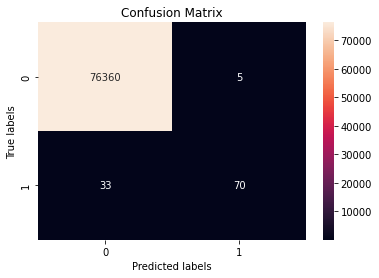

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

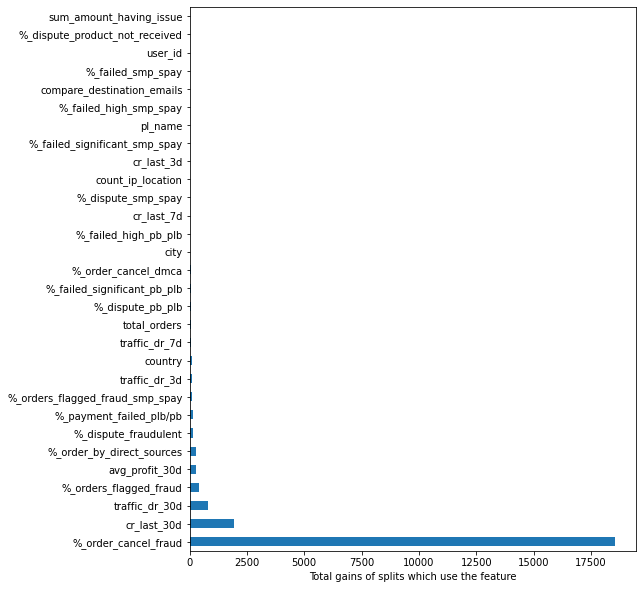

In [42]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))
plt.xlabel('Total gains of splits which use the feature')
plt.show()

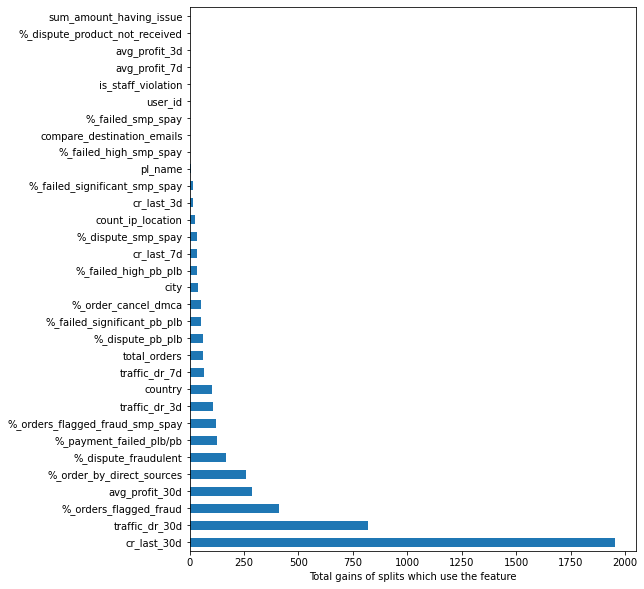

In [43]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp[feat_imp <= 2000].sort_values(ascending=False).plot(kind='barh', figsize=(8,10))
plt.xlabel('Total gains of splits which use the feature')
plt.show()

In [44]:
# test_fp_fn = deepcopy(X_test)
# test_fp_fn['true_label'] = y_test
# test_fp_fn['predicted_label'] = y_pred
# test_fp_fn['score'] = y_pred_score[:, 1]

In [45]:
# test_fp_fn

In [46]:
# test_fp_fn.to_csv('test_fp_fn.csv')
# files.download('test_fp_fn.csv')

## Train model on daily data

In [47]:
check_date = '2023-02-27'
data_path = '/content/drive/MyDrive/PO_review/daily/' + check_date + '/' + check_date

PO_predict_1 = pd.read_csv(data_path + '_PO_1.csv')
PO_predict_2 = pd.read_csv(data_path + '_PO_2.csv')
PO_predict_3 = pd.read_csv(data_path + '_PO_3.csv')
PO_predict_4 = pd.read_csv(data_path + '_PO_4.csv')

In [48]:
PO_predict_1.rename(columns={
    'User Id': 'user_id', 
    'Pl Name': 'pl_name', 
    'Total Order': 'total_orders', 
    '% orders flagged fraud': '%_orders_flagged_fraud', 
    '% orders flagged fraud Smp Spay': '%_orders_flagged_fraud_smp_spay', 
    '% payment failed PLB/PB': '%_payment_failed_plb/pb', 
    '% failed significant PB PLB': '%_failed_significant_pb_plb', 
    '% failed high PB PLB': '%_failed_high_pb_plb', 
    '% failed Smp Spay': '%_failed_smp_spay', 
    '% failed significant Smp Spay': '%_failed_significant_smp_spay', 
    '% failed high Smp Spay': '%_failed_high_smp_spay', 
    '% dispute PB PLB': '%_dispute_pb_plb', 
    '% dispute Smp Spay': '%_dispute_smp_spay', 
    '% dispute fraudulent': '%_dispute_fraudulent', 
    '% dispute product not received': '%_dispute_product_not_received'},
    inplace=True)

PO_predict_2.rename(columns={
    'User Id': 'user_id', 
    'Pl Name': 'pl_name', 
    '% order cancel fraud': '%_order_cancel_fraud', 
    '% order cancel DMCA': '%_order_cancel_dmca', 
    'Sum amount having issue': 'sum_amount_having_issue', 
    'Avg Profit 3 D': 'avg_profit_3d', 
    'Avg Profit 7 D': 'avg_profit_7d', 
    'Avg Profit 30 D': 'avg_profit_30d', 
    '% order by direct source': '%_order_by_direct_sources'
}, inplace=True)

PO_predict_3.rename(columns={
    'User Id': 'user_id', 
    'Pl Name': 'pl_name', 
    'Count Ip Location': 'count_ip_location', 
    'Country': 'country', 
    'City': 'city', 
    'City.1': 'city_1', 
    'Compare Destination Emails': 'compare_destination_emails', 
    'Is Staff Violation': 'is_staff_violation'
}, inplace=True)

PO_predict_4.rename(columns={
    'User Id': 'user_id', 
    'Pl Name': 'pl_name', 
    'Cr Last 3 D': 'cr_last_3d', 
    'Cr Last 7 D': 'cr_last_7d', 
    'Cr Last 30 D': 'cr_last_30d', 
    'Traffic Dr 3 D': 'traffic_dr_3d', 
    'Traffic Dr 7 D': 'traffic_dr_7d', 
    'Traffic Dr 30 D': 'traffic_dr_30d'
}, inplace=True)

PO_predict_1_2 = pd.merge(PO_predict_1, PO_predict_2, how='outer', on=['user_id', 'pl_name'])
PO_predict_1_3 = pd.merge(PO_predict_1_2, PO_predict_3, how='outer', on=['user_id', 'pl_name'])
PO_predict_1_4 = pd.merge(PO_predict_1_3, PO_predict_4, how='outer', on=['user_id', 'pl_name'])
PO_predict_1_4.drop('city_1', axis=1, inplace=True)

In [49]:
# PO_predict_1_4 = deepcopy(checking_data)

In [50]:
for c in PO_predict_1_4.columns:
    col_type = PO_predict_1_4[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        PO_predict_1_4[c] = PO_predict_1_4[c].astype('category')
PO_predict_1_4['user_id'] = PO_predict_1_4['user_id'].astype('category') # convert user_id to categorical feature to avoid misleading
PO_predict_1_4['count_ip_location'] = PO_predict_1_4['count_ip_location'].astype('category') # convert count_ip_location to categorical feature to avoid misleading
PO_predict_1_4['compare_destination_emails'] = PO_predict_1_4['compare_destination_emails'].astype('category')

In [51]:
y_daily_pred = model.predict_proba(PO_predict_1_4)

In [52]:
import numpy as np
# np.set_printoptions(suppress = True)
score_raw = y_daily_pred[:, 1]

In [53]:
PO_predict_1_4['score'] = score_raw * 100
PO_predict_1_4['check_date'] = check_date

In [54]:
df = PO_predict_1_4[['check_date', 'user_id', 'pl_name', 'score']]

In [55]:
df

,check_date,user_id,pl_name,score
0,2023-02-27,140601,Platform,0.208547
1,2023-02-27,140601,Printbase,0.140476
2,2023-02-27,11236348,Plusbase,0.025892
3,2023-02-27,9140084,Platform,0.152706
4,2023-02-27,11213383,Plusbase,0.053870
...,...,...,...,...
78,2023-02-27,11239492,Platform,0.005592
79,2023-02-27,11225764,Printbase,0.005532
80,2023-02-27,251056,Printbase,0.122050
81,2023-02-27,11210240,Platform,0.016049


In [56]:
df.shape[0]

83

In [57]:
df['user_id'] = df['user_id'].astype(str)
df['pl_name'] = df['pl_name'].astype(str)
df['payout_id'] = ''
df['result via score'] = ''
df['actual result'] = ''
df = df[['check_date', 'payout_id', 'user_id', 'pl_name', 'score', 'result via score', 'actual result']]

<ipython-input-57-c2b64d8772f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_id'] = df['user_id'].astype(str)
<ipython-input-57-c2b64d8772f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pl_name'] = df['pl_name'].astype(str)
<ipython-input-57-c2b64d8772f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [58]:
ws = gc.open_by_key('1W6GgKDUNn3hWnCTGps80Damh8CCMi6MYGdMuEdbXr-s')
worksheet = ws.worksheet('score checking 02/2023')
rows = worksheet.get_all_values()
template = pd.DataFrame.from_records(rows)
template = template.rename(columns=template.iloc[0]).drop(template.index[0])
df_final = deepcopy(template)
df_final = df_final[df_final['check_date'] < check_date]

In [59]:
test = pd.concat([df, df_final])

In [60]:
# pd.set_option('display.max_rows', None)
test['score'] = pd.to_numeric(test['score'])
# test['note'] = test['note'].astype(str)
# test['recheck_result'] = test['recheck_result'].astype(str)
test.loc[test['score'] >= 90, 'result via score'] = 'Reject'
test.loc[(test['score'] >= 50) & (test['score'] < 90), 'result via score'] = 'Hold theo amount'
test.loc[test['score'] < 50, 'result via score'] = 'Approve'
test.fillna('', inplace=True)

In [61]:
test['pl_name'].unique()

array(['Platform', 'Printbase', 'Plusbase', 'Shopbase Creator'],
      dtype=object)

In [62]:
test

,check_date,payout_id,user_id,pl_name,score,result via score,actual result,note,recheck_result
0,2023-02-27,,140601,Platform,0.208547,Approve,,,
1,2023-02-27,,140601,Printbase,0.140476,Approve,,,
2,2023-02-27,,11236348,Plusbase,0.025892,Approve,,,
3,2023-02-27,,9140084,Platform,0.152706,Approve,,,
4,2023-02-27,,11213383,Plusbase,0.05387,Approve,,,
...,...,...,...,...,...,...,...,...,...
805,2023-02-01,39277,9133690,Printbase,0.035802,Approve,,,
806,2023-02-01,39267,133994,Platform,0.102746,Approve,,,
807,2023-02-01,39250,133994,Platform,0.102746,Approve,,,
808,2023-02-01,39266,9144032,Plusbase,0.023746,Approve,,,


# Lọc pl_type

In [63]:
raw_ws = ws.worksheet('checking 02/2023')
raw_data = pd.DataFrame.from_records(raw_ws.get_all_records(head=4)) # Đọc dữ liệu.
raw_data = raw_data.loc[~raw_data['check_date'].isin(['', 'check_date']), ['payout_id', 'check_date', 'user_id', 'pl_name']]
raw_data['user_id'] = raw_data['user_id'].astype(str)
# raw_data['pl_name'].unique()

In [64]:
raw_data.shape[0]

872

In [65]:
# Remap pl_type

dict_pl = {'plusbase':'Plusbase',
           'printbase':'Printbase',
           'spay':'Platform',
           'SMP':'Platform',
           'other':'Platform'}
raw_data['pl_name'] =  raw_data['pl_name'].map(dict_pl)

In [66]:
filter_data = pd.merge(raw_data, test, on=['check_date', 'user_id', 'pl_name'], how='outer')
filter_data.shape

(1070, 10)

In [67]:
filter_data = filter_data[filter_data['payout_id_x'].notna()]

In [68]:
score_checking_final = filter_data[['check_date', 'payout_id_x', 'user_id', 'pl_name', 'score', 'result via score', 'actual result', 'note', 'recheck_result']].rename(columns={'payout_id_x':'payout_id'})
score_checking_final.fillna('', inplace=True)
score_checking_final.drop_duplicates(inplace=True)

In [69]:
score_checking_final.head(10)

,check_date,payout_id,user_id,pl_name,score,result via score,actual result,note,recheck_result
0,2023-02-28,40985,11212063,Platform,,,,,
1,2023-02-28,41000,11213383,Plusbase,,,,,
2,2023-02-28,41024,11213383,Plusbase,,,,,
3,2023-02-28,41023,11213383,Plusbase,,,,,
4,2023-02-28,40993,11213383,Plusbase,,,,,
5,2023-02-28,41004,141422,Plusbase,,,,,
6,2023-02-28,40982,251259,Plusbase,,,,,
7,2023-02-28,41003,9155945,Plusbase,,,,,
8,2023-02-28,41015,9207427,Plusbase,,,,,
9,2023-02-28,40986,9470853,Printbase,,,,,


In [70]:
# filter_data.to_csv('test.csv')
# files.download('test.csv')

# Write data

In [ ]:
worksheet.clear()
worksheet.update(None,[score_checking_final.columns.to_list()]+ score_checking_final.to_numpy().tolist()) # Ghi data lên google sheet "Summary"
# worksheet.update(None,[score_checking_final_2.columns.to_list()]+ score_checking_final_2.to_numpy().tolist()) # Ghi data lên google sheet "Summary"
# worksheet.update(None,[df_final.columns.to_list()]+ df_final.to_numpy().tolist()) # Ghi data lên google sheet "Summary"

{'spreadsheetId': '1W6GgKDUNn3hWnCTGps80Damh8CCMi6MYGdMuEdbXr-s',
 'updatedRange': "'score checking 02/2023'!A1:I483",
 'updatedRows': 483,
 'updatedColumns': 9,
 'updatedCells': 4347}

# SHAP interpret model

In [ ]:
! pip install shap

In [ ]:
import shap

In [ ]:
model_interpret = lgb.LGBMClassifier(**params_updated)
model_interpret.fit(X_train.drop(['user_id', 'pl_name', 'count_ip_location', 'country', 'city', 'compare_destination_emails'], axis=1), y_train)
y_pred = model_interpret.predict(PO_predict_1_4.drop(['user_id', 'pl_name', 'count_ip_location', 'country', 'city', 'compare_destination_emails'], axis=1))

# print(roc_auc_score(y_test, y_pred))

In [ ]:
explainer = shap.Explainer(model_interpret.predict, PO_predict_1_4.drop(['user_id', 'pl_name', 'count_ip_location', 'country', 'city', 'compare_destination_emails'], axis=1))
shap_values = explainer(PO_predict_1_4.drop(['user_id', 'pl_name', 'count_ip_location', 'country', 'city', 'compare_destination_emails'], axis=1))

In [ ]:
shap_values

In [ ]:
shap.plots.waterfall(shap_values[41], max_display=30)

In [ ]:
df.loc[41, :]

In [ ]:
# X_test.info()

# Build metric to evaluate

In [ ]:
ws_fraud = gc.open_by_key('1NH2iElGqZDDwl7aUP5ZO5h5YdO4ryO8t1VFaI0ZBZFA')
fraud_log_sheet = ws_fraud.worksheet('fraud_log')
fraud_log_data = pd.DataFrame.from_records(fraud_log_sheet.get_all_records(head=2)) # Đọc dữ liệu từ sheet Fraud_log

In [ ]:
fraud_log_data.head(10)

In [ ]:
fraud_log_data['Block_type'].unique()

In [ ]:
blocked_data = fraud_log_data[~fraud_log_data['Block_type'].isin(['Not_block', ''])]

In [ ]:
blocked_data.shape